# Laborator 05-06

În laboratorul trecut am observat cum rezultatul metodelor hill climbing depinde foarte mult de punctul de pornire și de parametrizare. Un alt algoritm stohastic, ce poate oferi o mai bună balanță între explorare și exploatare și o independență în cea ce privește punctul de start este inspirat din călirea metalurgică. Încălzirea urmată de răcirea controlată a unui material rezultă în creșterea dimensiunii cristalelor și reduce defectele structurale.


![](https://image.slidesharecdn.com/f-annealing-131118222251-phpapp02/95/annealing-39-638.jpg?cb=1384813935)

Fig. 1. Exemplificarea procesului de cristalizare prin călire. [Sursa imaginii](https://www.slideshare.net/RakeshSingh125/f-annealing). 


Inițial, prin creșterea temperaturii, [căldura dislocă atomii](https://www.sciencelearn.org.nz/resources/750-heat-energy) din poziţiile fixe (minim local) şi permite acestora să [viziteze aleatoriu stări cu energie mai ridicată](https://www.youtube.com/watch?v=qW59Y9lJso8). Apoi, o răcire graduală și lentă acordă timp și implicit mai multe şanse atomilor dislocați să găsească o configuraţie mai bună, cu o energie internă mai mică decât cea iniţială.


## Călirea simulată

Călirea simulată, denumit în engleză [Simulated Annealing](https://en.wikipedia.org/wiki/Simulated_annealing), este o metodă stocastică pentru aproximarea optimului global al unei funcții, ce permite la fiecare pas trecerea într-o stare inferioară (soluție mai slabă calitativ) cu o probabilitate direct proporțională cu "temperatura" (simulată) actuală (linia 13, pseudocod fig. 2). 

Metoda pornește cu o temperatură inițială ridicată și tinde în timp la 0, conform unui program de răcire (o funcție monoton descrescătoare, `calculate_tempereature(i)` - linia 7, pseudocod fig. 2).). Astfel la început, probabilitatea acceptării a unor stări inferioare este foarte mare, algoritmul poate ușor ieși din vecinătatea unui optim local. În această fază metoda probează spațiul de căutare în mod aleatoriu, traiectoria descrisă este haotică ([random walk](https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm)), explorarea este maximă. Scăderea graduală a temperaturii induce o focusare din ce în ce mai pronunțată spre îmbunătățire, o trecere graduală de la explorare accentuată spre exploatare accentuată. În această fază comportamentul metodei se aseamănă cu [coborârea cu gradient stocastic](https://arxiv.org/abs/1609.04747) ([stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)). În final, la temperaturi scăzute, probabilitatea acceptării unei soluții inferioare devine minusculă (dar nu 0, imposibilă), metoda este axată pe exploatare.

![](https://d3i71xaburhd42.cloudfront.net/9f01f2a70d64f2abbbf8d8a75d340a7f27586a25/8-Figure3-1.png)

Fig. 2. Pseudocod pentru metoda călirii simulate. [Sursa imaginii](https://link.springer.com/article/10.1007/s00500-016-2067-4).

Cu un program de răcire suficient de lung (teoretic infinit) și lent (cu suficiente iterații la fiecare nivel de temperatură), algoritmul garantează găsirea optimului global, din păcate într-un număr exponențial de pași în raport cu dimensiunea problemei

Pentru obținerea unor rezultate bune, în practică trebuie bine echilibrată tranziția de la explorare spre exploatare. În cazul unei funcții obiectiv extrem de multimodal, folosirea unui program de răcire prea agresiv poate duce la o "înghețare" prematură, blocare într-un minim local. Utilizarea unui program de răcire mai lent scade probabilitatea convergenței premature într-un minim local, însă ea necesită cerințe de calcul crescute.


# Exemplu optimizare

Considerăm problema [comis-voiajorului](https://ro.wikipedia.org/wiki/Problema_comis-voiajorului) pentru cele mai mari 20 de orașe din SUA, folosind o [implementație a metodei în Python](https://github.com/perrygeo/simanneal).

In [9]:
!pip install simanneal

In [10]:
from simanneal import Annealer
import math

In [11]:
def geographicDistance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 6378.1  # equatorial radius of Earth https://imagine.gsfc.nasa.gov/features/cosmic/earth_info.html
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R

In [12]:
class TravellingSalesmanProblem(Annealer):
    """Test annealer with a travelling salesman problem."""
    def __init__(self, state, distance_matrix_ro):
        self.distance_matrix_ro = distance_matrix_ro
        super(TravellingSalesmanProblem, self).__init__(state)  

    def move(self):
        """Swaps two cities in the route."""
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix_ro[self.state[i-1]][self.state[i]]
        return e

In [13]:
# latitude and longitude for the twenty largest U.S. cities
# https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

ro_city = {
        'Bucuresti': (44.26, 26.6),
        'Bacau': (46.35, 26.55),
        'Brasov': (45.36, 25.36),
        'Braila': (45.16, 27.57),
        'Galati': (45.26, 28.2),
        'Cluj-Napoca': (46.46, 23.35),
        'Constanta': (44.1, 28.38),
        'Craiova': (44.2, 23.49),
        'Iasi': (47.9, 27.35),
        'Oradea': (47.04, 21.55),
        'Ploiesti': (44.56, 26.1),
        'Timisoara': (45.47, 21.17),
    }

In [14]:
import random
init_state_ro = list(ro_city)
random.shuffle(init_state_ro)
print(init_state_ro)

['Cluj-Napoca', 'Bacau', 'Ploiesti', 'Craiova', 'Galati', 'Timisoara', 'Brasov', 'Oradea', 'Bucuresti', 'Braila', 'Constanta', 'Iasi']


In [15]:
from collections import defaultdict
# create an adjacency matrix - https://en.wikipedia.org/wiki/Adjacency_matrix
distance_matrix_ro = defaultdict(dict)
for ka, va in ro_city.items():
  for kb, vb in ro_city.items():
    distance_matrix_ro[ka][kb] = 0.0 if kb == ka else geographicDistance(va, vb)

print('The distance from Iasi to Bacau is {0} kms.'.format(distance_matrix_ro['Iasi']['Bacau']))


The distance from Iasi to Bacau is 182.8715458550273 kms.


Confirm with Google:

https://www.google.com/search?client=safari&rls=en&q=distance+new+york+to+houston&ie=UTF-8&oe=UTF-8

![](https://www.google.com/maps/vt/data=6dwNcCGg2G7qCjzYYqmJEvOdwo3PgE9W1cAWPqOISd3KCjFsBMSOiQAICYx0I_jjWmQris4hQePQoQyrx4AlvoeJ_guXdArgnA6Kpte8Na4_RaUTcT_tLLnd4FCx5ITouhQKjNDCLdh3qLx409QSRDMKlxA4eVsp4p7wl__yGnMO1ronpZAjHtKBnmAd,3-zgxN7akVijwp6XwwoZFPZqIq2xWsAQvVlfYY3ZjKSbZlcBxOF74y4qPLf3M0G5_JzyiXpogRqPH290MBSfK418Y3GbASjpkdz5cCQy7FiGqCuKVcZ_vTPr_-IHYnfv0wWQvsLGp0J3AYXrnST-yz_SxrfYVOzvd4mjgNBnwDibdQxoFT6iHnfaq7zLTyAig23Lt-ehVUkeWySw-dCNCv1RGCFnmUqpgoS0Y278AqbMlfpxTCdmQdsEKURB7RfZ8YTFTXslG9tcd6WV-N62Y8t4PJEalDmQUOgaLbrG_aK71_ZYUn_0hW8PYxtH4VFxt4ZMaxtZ_8J__w63usk9rXfT184R6ndQE6_CpwFArJF_uXI0WkZXIDZmKVBXZX5bO_y1GLM?scale=2&h=200&w=618)

In [17]:
#Optimizarea problemei



tsp_ro = TravellingSalesmanProblem(init_state_ro, distance_matrix_ro)# Specificam starea initiala si matricea de distante
tsp_ro.set_schedule(tsp_ro.auto(minutes = 1)) # Setam timpul de rulare maxim la 1 min

tsp_ro.copy_strategy = 'slice'
state_ro, e_ro = tsp_ro.anneal() # Initializam operatiunea de optimizare 

while state_ro[0] != 'Iasi':
    state_ro = state_ro[1:] + state_ro[:1]  # rotate NYC to start

print()
print("%i km route:" % e_ro)
print(" ➞  ".join(state_ro))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining



1918 km route:
Iasi ➞  Cluj-Napoca ➞  Oradea ➞  Timisoara ➞  Craiova ➞  Brasov ➞  Ploiesti ➞  Bucuresti ➞  Constanta ➞  Galati ➞  Braila ➞  Bacau


### Vizualizarea rutei obținute


In [19]:
!pip install geopandas

In [20]:
!pip install geoplot

     |████████████████████████████████| 14.4MB 310kB/s 
     |████████████████████████████████| 19.1MB 221kB/s 
     |████████████████████████████████| 225kB 41.0MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127700 sha256=812535a59879d03c644ce0e4ee37926052076166e6e20ee7fcd40bff0d68b31f
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=90bb5526c48af1043988ee0184a031dc3e11f6a653c92e8e2fcf2016ca8552d2
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point, Polygon

In [23]:
df_ro = pd.DataFrame(
    {'City': ro_city.keys(),
     'Latitude': [m[0] for m in ro_city.values()],
     'Longitude': [m[1] for m in ro_city.values()]})
df_ro.head()


,City,Latitude,Longitude
0,Bucuresti,44.26,26.60
1,Bacau,46.35,26.55
2,Brasov,45.36,25.36
3,Braila,45.16,27.57
4,Galati,45.26,28.20


In [24]:
# De la un dataframe trecem la un geodataframe

gdf_ro = gpd.GeoDataFrame(
    df_ro, geometry=gpd.points_from_xy(df_ro.Longitude, df_ro.Latitude), crs = 4326)

gdf_ro

,City,Latitude,Longitude,geometry
0,Bucuresti,44.26,26.60,POINT (26.60000 44.26000)
1,Bacau,46.35,26.55,POINT (26.55000 46.35000)
2,Brasov,45.36,25.36,POINT (25.36000 45.36000)
3,Braila,45.16,27.57,POINT (27.57000 45.16000)
4,Galati,45.26,28.20,POINT (28.20000 45.26000)
5,Cluj-Napoca,46.46,23.35,POINT (23.35000 46.46000)
6,Constanta,44.10,28.38,POINT (28.38000 44.10000)
7,Craiova,44.20,23.49,POINT (23.49000 44.20000)
8,Iasi,47.90,27.35,POINT (27.35000 47.90000)
9,Oradea,47.04,21.55,POINT (21.55000 47.04000)


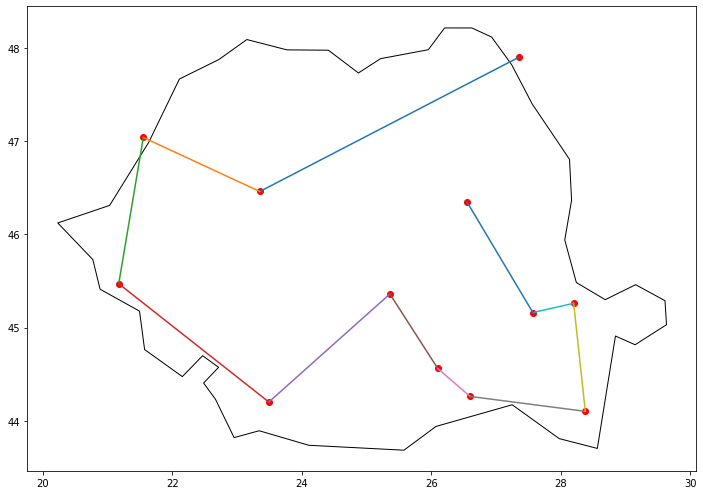

In [25]:
# Incarcam harta lumii
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Selectam regiunea pentru Romania , afisam harta tarii
ax = world[world.name == 'Romania'].plot(
    color='white', edgecolor='black', figsize=(12, 10))

gdf_ro.plot(ax=ax,color='red')

# Parcurgem traseul gasit
for i in range(0, len(state_ro)-1):
  plt.plot( [df_ro[df_ro.City==state_ro[i]].Longitude, df_ro[df_ro.City==state_ro[i+1]].Longitude], [df_ro[df_ro.City==state_ro[i]].Latitude, df_ro[df_ro.City==state_ro[i+1]].Latitude])

plt.show()

# Exerciții

1. Conform articolului ["On the Convergence Time of Simulated Annealing"](https://core.ac.uk/download/pdf/76359167.pdf) ce se poate afirma despre convergența metodei?
2. Care [programe de răcire](https://www.researchgate.net/publication/282449315_A_Comparative_Study_of_Simulated_Annealing_with_different_Cooling_Schedules_for_Geometric_Optimization_of_a_Heat_Transfer_Problem_According_to_Constructal_Design) (cooling schedule) sunt cel mai des folosite? La ce tipuri de probleme se pretează programele de răcire mai lente?
3. Conform [acestei](https://page.mi.fu-berlin.de/prechelt/Biblio/kangaroo_analogy.html) analogii amuzante, cum este descrisă dinamica călirii simulate? 
4. Cu ajutorul [`scipy.optimize.anneal`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.anneal.html) găsiți optimele funcțiilor studiate laboratorul precedent (conform exemplului din documentație - schimbați definiția funcției `f`). Cum se compară performanța cu strategiile de îmbunătățire iterativă, în cazul funcțiilor multimodale?
5. Rezolvați problema comis voiajorului pentru [municipiile de rang 0 din România](https://ro.wikipedia.org/wiki/Municipiile_României).
6. *Implementați (soluție proprie) metoda călirii simulate, exemplificați funcționalitatea pe o problemă aleasă.* **(opțional, punct în plus)**.